[*********************100%%**********************]  5 of 5 completed


Annualized Volatility:
0.5903047086673869
Annualized Return:
-0.08160393324445814
Sharpe Ratio:
-0.23141257597765322


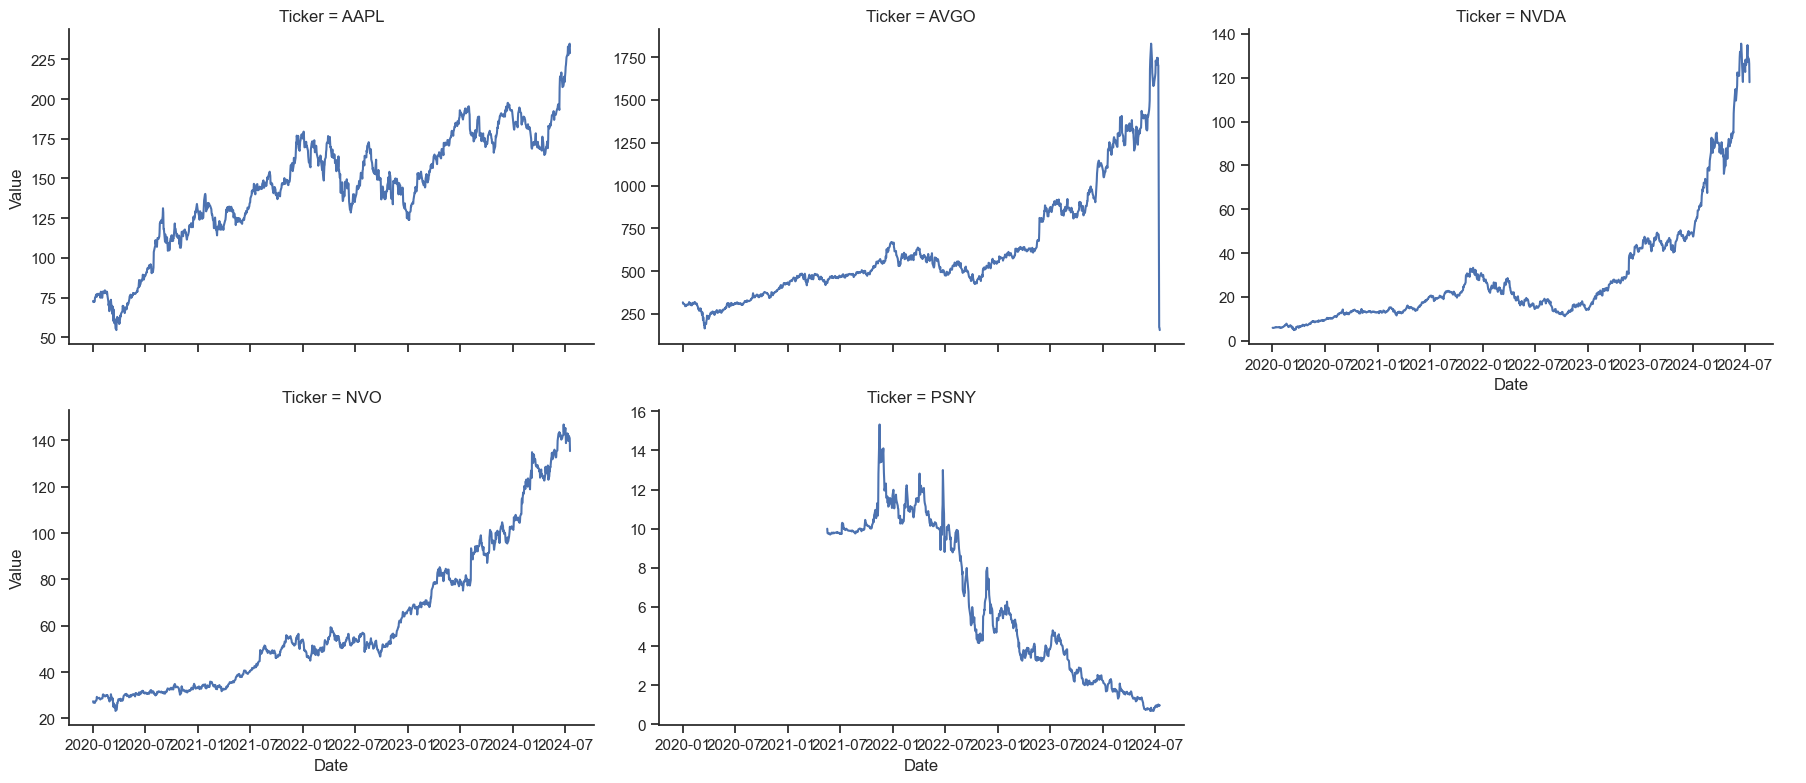

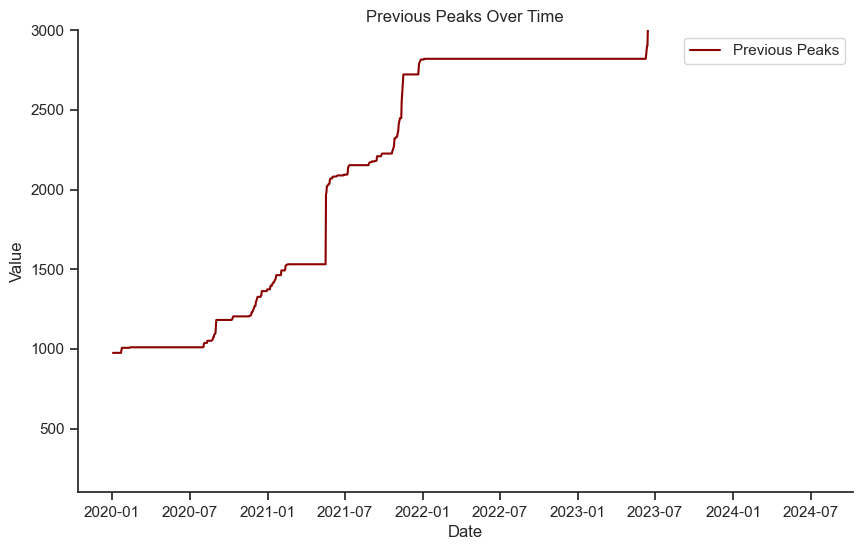

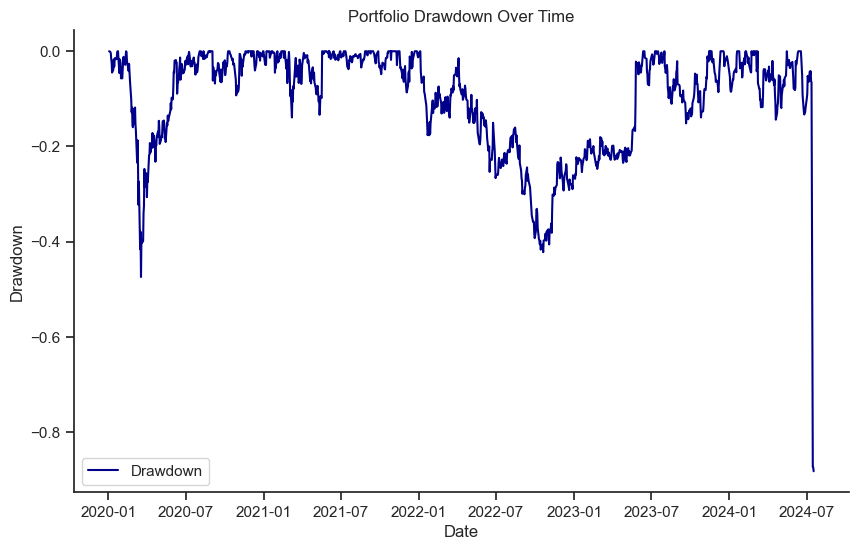

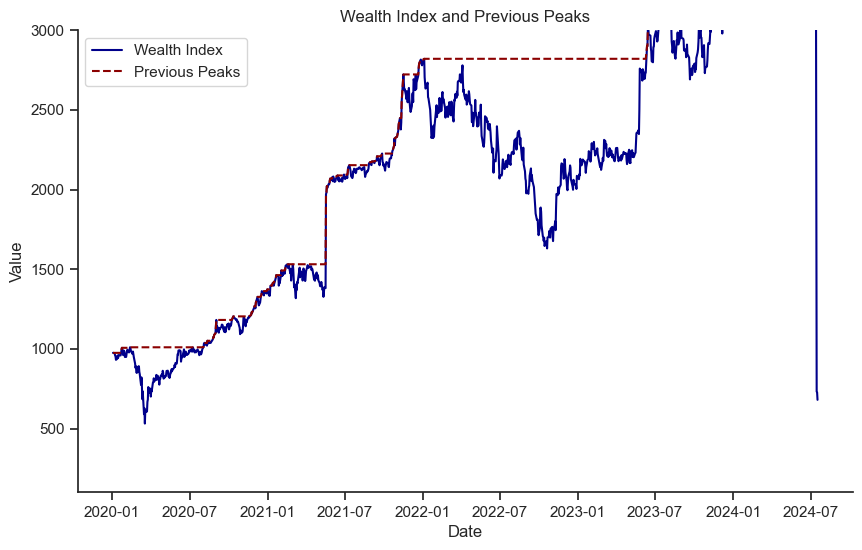

Max Drawdown:
-0.8819564267950626


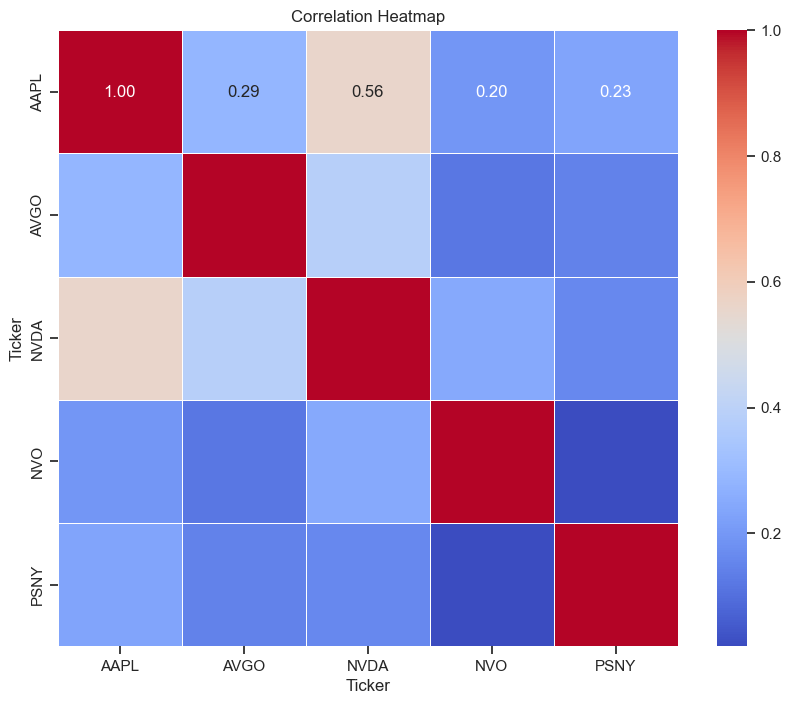

In [29]:
# Import the necessary packages

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input portfolio data manually. Ticker and number of shares respectively
portfolio = pd.DataFrame({
    'Ticker': ['AAPL', 'NVDA', 'PSNY', 'NVO', 'AVGO'],
    'Shares': [1, 1, 200, 1, 10]
})

# Time horizon for data and backtesting
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Historic price data fetched via API
data = yf.download(portfolio['Ticker'].tolist(), start=start_date, end=end_date)

# Adjust the data for stock splits
adj_close = data['Adj Close']

# Setting up dataframe using Pandas
portfolio_value = pd.DataFrame(index=adj_close.index)

# Calculate the portfolio value over time
for i, row in portfolio.iterrows():
    ticker = row['Ticker']
    shares = row['Shares']
    
    # Calculate value of the position over time
    position_value = adj_close[ticker] * shares
    portfolio_value[ticker] = position_value

# Sum the value of all positions to derive portfolio value
portfolio_value['Total'] = portfolio_value.sum(axis=1)

# Replace infinite values with NaN in the portfolio_value DataFrame
portfolio_value.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate daily returns
portfolio_returns = portfolio_value['Total'].pct_change().dropna()

# Calculate annualized volatility
annualized_vol = portfolio_returns.std() * np.sqrt(252)

# Calculate annualized return
n_days = portfolio_returns.shape[0]
annualized_return = (portfolio_returns + 1).prod()**(252/n_days) - 1

# Input riskfree rate manually
riskfree_rate = 0.055

# Calculate Sharpe ratio
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_vol

print("Annualized Volatility:")
print(annualized_vol)
print("Annualized Return:")
print(annualized_return)
print("Sharpe Ratio:")
print(sharpe_ratio)

# Calculate wealth index
wealth_index = 1000 * (1 + portfolio_returns).cumprod()

# Replace infinite values with NaN in wealth_index
wealth_index.replace([np.inf, -np.inf], np.nan, inplace=True)

# Defining Seaborn theme and color palette settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Prepare data for Seaborn FacetGrid
data_long = adj_close.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Value')

# Create Seaborn FacetGrid plot with actual values
g = sns.FacetGrid(data_long, col="Ticker", col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'Date', 'Value', linewidth=1.5)
g.add_legend()

# Show the plot
plt.show()

# Calculate previous peaks
previous_peaks = wealth_index.cummax()

# Plot previous peaks with improved labels and extended y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(previous_peaks, label='Previous Peaks', color='darkred', linewidth=1.5)
plt.title('Previous Peaks Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.ylim(100, 3000)
plt.legend()
plt.show()

# Calculate drawdown
drawdown = (wealth_index - previous_peaks) / previous_peaks

# Replace infinite values with NaN in drawdown
drawdown.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot drawdown with improved labels
plt.figure(figsize=(10, 6))
plt.plot(drawdown, label='Drawdown', color='darkblue', linewidth=1.5)
plt.title('Portfolio Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

# Plot wealth index and previous peaks together with improved labels
plt.figure(figsize=(10, 6))
plt.plot(wealth_index, label='Wealth Index', color='darkblue', linewidth=1.5)
plt.plot(previous_peaks, label='Previous Peaks', linestyle='--', color='darkred', linewidth=1.5)
plt.title('Wealth Index and Previous Peaks')
plt.xlabel('Date')
plt.ylabel('Value')
plt.ylim(100, 3000)
plt.legend()
plt.show()

# Calculate max drawdown for the portfolio
max_drawdown = drawdown.min()
print("Max Drawdown:")
print(max_drawdown)

# Calculate the correlation matrix
corr_matrix = adj_close.pct_change().dropna().corr()

# Plot the heatmap for correlations with formatted numbers and better color distinction
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()